# House Price Prediction
**This project focuses on predicting house prices using a Linear Regression model. The workflow involves data preparation, feature evaluation, model training, and performance assessment using RMSE and R² metrics.**

## Data Preparation

In [6]:
# Import libraries and Packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # Model Machine Learning (Same as part Below)
from sklearn.metrics import mean_squared_error, r2_score # Evaluation Metrics Regression (Quantitative Evaluations)

**Features:**
- Square_Footage: The size of the house in square feet. Larger homes typically have higher prices.
- Num_Bedrooms: The number of bedrooms in the house. More bedrooms generally increase the value of a home.
- Num_Bathrooms: The number of bathrooms in the house. Houses with more bathrooms are typically priced higher.
- Year_Built: The year the house was built. Older houses may be priced lower due to wear and tear.
- Lot_Size: The size of the lot the house is built on, measured in acres. Larger lots tend to add value to a property.
- Garage_Size: The number of cars that can fit in the garage. Houses with larger garages are usually more expensive.
- Neighborhood_Quality: A rating of the neighborhood’s quality on a scale of 1-10, where 10 indicates a high-quality neighborhood. Better neighborhoods usually command higher prices.
- House_Price (Target Variable): The price of the house, which is the dependent variable you aim to predict.

In [7]:
# Load Dataset
house=pd.read_csv('house_price_regression_dataset.csv')
house.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [8]:
house.tail()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
995,3261,4,1,1978,2.165110,2,10,701493.997069
996,3179,1,2,1999,2.977123,1,10,683723.160704
997,2606,4,2,1962,4.055067,0,2,572024.023634
998,4723,5,2,1950,1.930921,0,7,964865.298639
999,3268,4,2,1983,3.108790,2,2,742599.253332


In [9]:
house.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


In [10]:
house.info()  #Checking if there is null-value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [11]:
house.shape

(1000, 8)

## Data Visualization
*Looking for some correlations each variables*

### Housing Price and Square Footage

<Axes: xlabel='House_Price', ylabel='Square_Footage'>

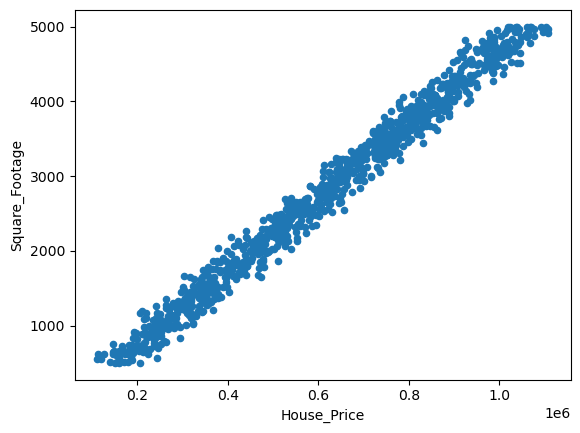

In [12]:
house.plot(x='House_Price', y='Square_Footage', kind='scatter')


### Bedrooms and Square Footage

<Axes: xlabel='Num_Bedrooms', ylabel='Square_Footage'>

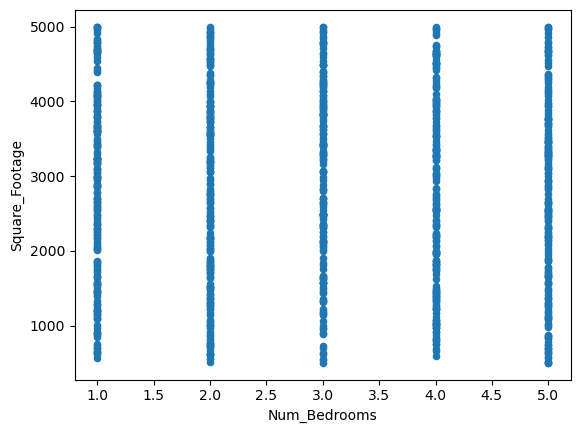

In [13]:
house.plot(x='Num_Bedrooms', y='Square_Footage', kind='scatter')


### Bedroom and House Price

<Axes: xlabel='Num_Bedrooms', ylabel='House_Price'>

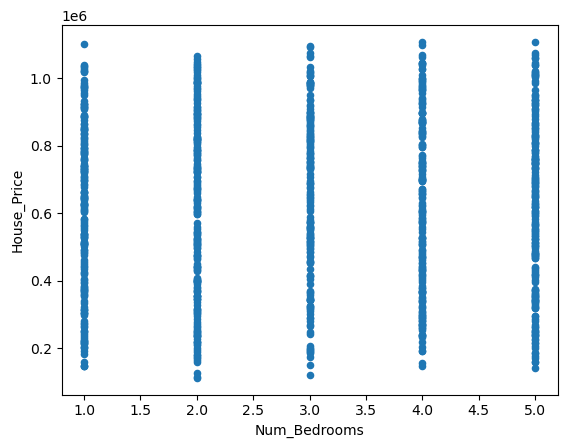

In [14]:
house.plot(x='Num_Bedrooms', y='House_Price', kind='scatter')

### Built Year and House Price

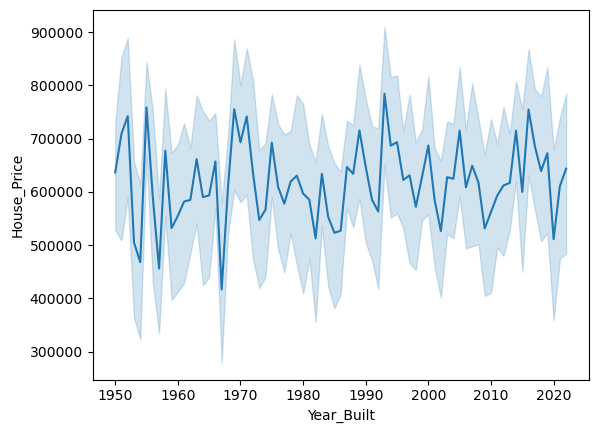

In [15]:
sns.lineplot(x='Year_Built', y='House_Price', data=house)
plt.show()

### Garage and House Price

<Axes: xlabel='Garage_Size', ylabel='House_Price'>

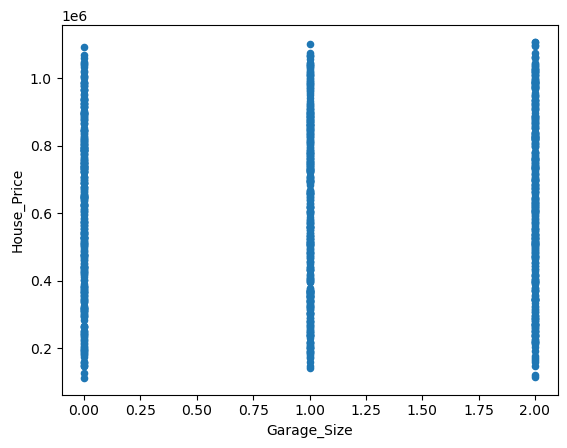

In [17]:
house.plot(x='Garage_Size', y='House_Price', kind='scatter')

### Neighborhood Quality and House Price

<Axes: xlabel='Neighborhood_Quality', ylabel='House_Price'>

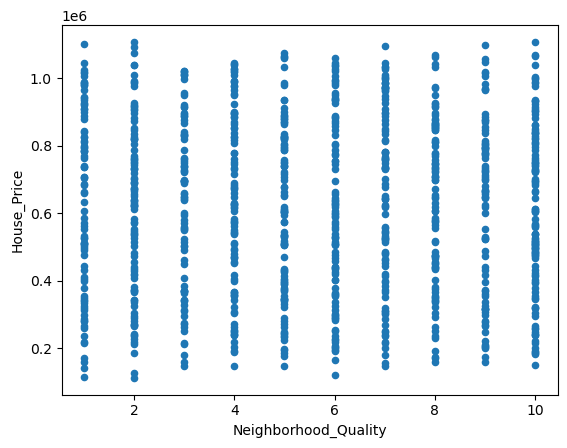

In [18]:
house.plot(x='Neighborhood_Quality', y='House_Price', kind='scatter')

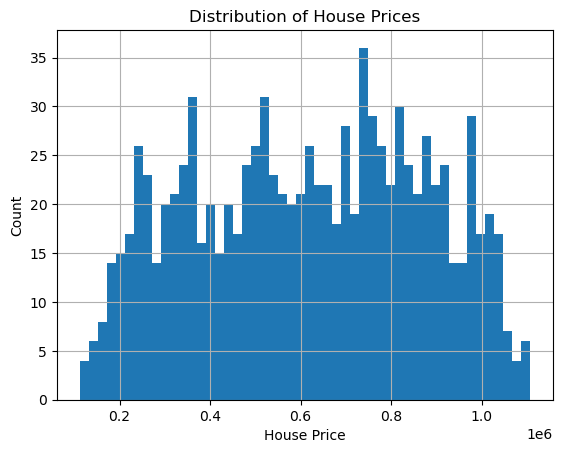

In [19]:
# House Price Distribution
house['House_Price'].hist(bins=50)
plt.title('Distribution of House Prices')
plt.xlabel('House Price')
plt.ylabel('Count')
plt.show()

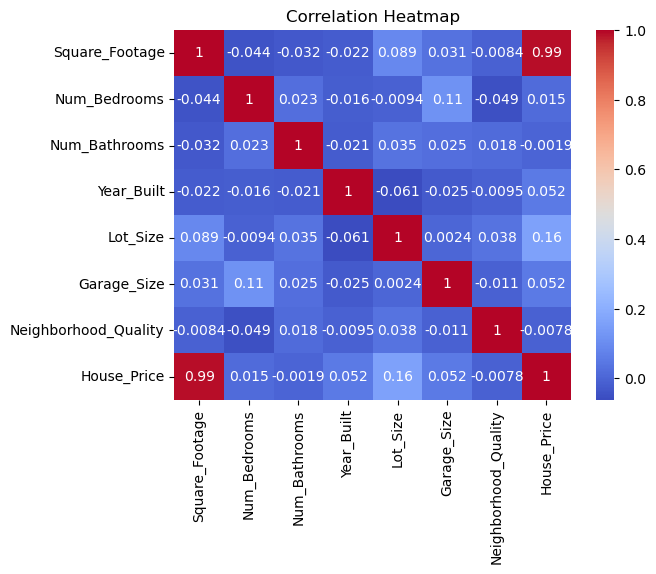

In [20]:
# Heatmap
corr = house.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


- Based on my analysis of several scatterplots, I observe a linear correlation between square footage and house price; specifically, as the square footage increases, the price also tends to rise. 
- However, the year built appears to have no relationship with housing prices, as indicated by a scatterplot that shows a random distribution of points. 
- Additionally, the number of lot areas, garages, and neighborhood quality do not seem to affect house prices.
- The distribution of the data is also normal, so there is no need for a log transformation.

In [21]:
x=house['Square_Footage']
x.head()

0    1360
1    4272
2    3592
3     966
4    4926
Name: Square_Footage, dtype: int64

In [22]:
y=house['House_Price']
y.head()

0    2.623829e+05
1    9.852609e+05
2    7.779774e+05
3    2.296989e+05
4    1.041741e+06
Name: House_Price, dtype: float64

## Train and Test Sets

In [23]:
#Splitting data into train and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y, train_size=0.8, random_state=0000)

In [24]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(800,)
(800,)
(200,)
(200,)


In [27]:
x_train = np.array(x_train)[:, np.newaxis]
x_test = np.array(x_test)[:, np.newaxis]


In [28]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(800, 1)
(800,)
(200, 1)
(200,)


In [29]:
# Performing Linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [30]:
# Coefficient Calculation
print(lr.intercept_)
print(lr.coef_)

55837.92692659283
[200.20330104]


In [31]:
# 55837.92692659283 + (200.20330104 x square_footage)

## Predictions

In [32]:
# Making predictions on the testing set
y_pred = lr.predict(x_test)

In [33]:
type(y_pred)

numpy.ndarray

In [34]:
y_test.shape

(200,)

### Actual Vs Predicted

Text(0, 0.5, 'House Price')

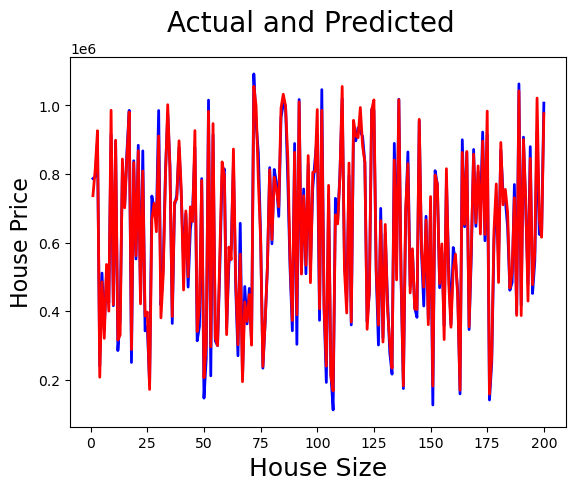

In [35]:
c = [i for i in range(1,201,1)]         # generating index 
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('House Size', fontsize=18)                               
plt.ylabel('House Price', fontsize=16)                       

### Error Terms

Text(0, 0.5, 'ytest-ypred')

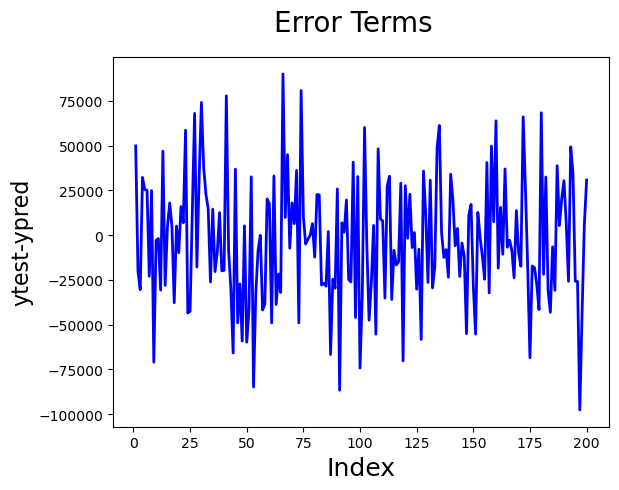

In [36]:
c = [i for i in range(1,201,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              
plt.xlabel('Index', fontsize=18)                     
plt.ylabel('ytest-ypred', fontsize=16)                

### R-Squared

In [42]:
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = r2_score(y_test, y_pred)
r_squared

0.9797984123786739

In [38]:
print('Root_Mean_Squared_Error :' ,rmse)
print('r_square_value :',r_squared)


Root_Mean_Squared_Error : 35011.97625770899
r_square_value : 0.9797984123786739


### RMSE

In [39]:
House_Price = house['House_Price']
error_rate = (rmse / House_Price.mean()) * 100
error_rate

np.float64(5.6574861241491465)

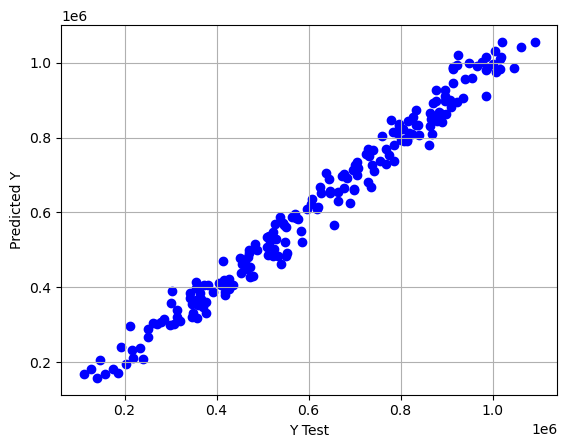

In [40]:
plt.scatter(y_test,y_pred,c='blue')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.grid()


### Model Evaluation Summary:
- The model demonstrates strong performance in predicting house prices.
- The RMSE accounts for only 5.6% of the average house price, indicating low prediction error.
- Additionally, the R² score is 0.97, meaning the model explains 97% of the variance in house prices.
- These results suggest that the model provides accurate and reliable predictions on the test data.

